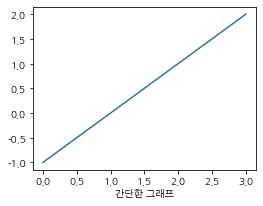

In [2]:
# 그래프 테스트
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [3]:
#2022-06-15 ~ 2023-01-11 까지 몸무게 증량 운동기록(하체) 불러오기
df = pd.read_csv('csv\Bulk_Upper_body.csv')

# 데이터타입, 결측치, 데이터 요약, 이상치 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                24 non-null     int64  
 1   DateTime          24 non-null     object 
 2   Weight(kg)        24 non-null     float64
 3   Pendlay_row(kg)   24 non-null     float64
 4   OHP(kg)           24 non-null     float64
 5   Rest_Period(day)  24 non-null     int64  
 6   Workout_time      24 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ KB


,ID,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,11.500000,73.545833,97.212500,67.845833,3.708333,1.208333
std,7.071068,4.633337,9.780029,5.879661,1.601064,0.779028
min,0.000000,66.300000,72.500000,55.000000,2.000000,0.000000
25%,5.750000,69.900000,90.500000,64.500000,3.000000,1.000000
50%,11.500000,74.100000,101.750000,70.000000,3.000000,1.000000
75%,17.250000,78.025000,103.900000,72.000000,4.000000,2.000000
max,23.000000,79.500000,106.800000,76.000000,10.000000,2.000000


In [4]:
# DateTime 형변환
df['DateTime'] = df['DateTime'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                24 non-null     int64         
 1   DateTime          24 non-null     datetime64[ns]
 2   Weight(kg)        24 non-null     float64       
 3   Pendlay_row(kg)   24 non-null     float64       
 4   OHP(kg)           24 non-null     float64       
 5   Rest_Period(day)  24 non-null     int64         
 6   Workout_time      24 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.4 KB


In [5]:
# 체중 대비 OHP, 바벨 로우 중량을 알아보기 위한 컬럼 만들기
df['OHP_Weight_per_kg'] =   df['OHP(kg)'] / df['Weight(kg)']
df['Pendlay_row_Weight_per_kg'] = df['Pendlay_row(kg)'] / df['Weight(kg)']

#소수 둘째자리까지 출력
df['OHP_Weight_per_kg'] = df['OHP_Weight_per_kg'].round(2)
df['Pendlay_row_Weight_per_kg'] = df['Pendlay_row_Weight_per_kg'].round(2)
df.head()

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
0,0,2022-06-14,66.3,72.5,55.0,2,2,0.83,1.09
1,1,2022-06-18,66.5,82.0,56.0,3,2,0.84,1.23
2,2,2022-06-25,66.8,81.0,57.5,3,2,0.86,1.21
3,3,2022-06-28,67.6,84.5,61.8,3,0,0.91,1.25
4,4,2022-07-09,68.2,87.0,63.0,3,1,0.92,1.28


In [6]:
# OHP 중량 순으로 정렬
df.sort_values('OHP(kg)', ascending=False).head(4)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
17,17,2022-11-10,78.7,106.0,76.0,4,2,0.97,1.35
19,19,2022-11-25,79.4,106.0,74.0,4,1,0.93,1.34
14,14,2022-10-07,75.6,106.5,74.0,4,1,0.98,1.41
16,16,2022-11-03,77.9,106.8,73.0,10,2,0.94,1.37


In [7]:
# 바벨로우 중량 순으로 정렬
df.sort_values('Pendlay_row(kg)', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
16,16,2022-11-03,77.9,106.8,73.0,10,2,0.94,1.37
14,14,2022-10-07,75.6,106.5,74.0,4,1,0.98,1.41
19,19,2022-11-25,79.4,106.0,74.0,4,1,0.93,1.34


In [8]:
# 체중 대비 OHP 중량 순으로 정렬
df.sort_values('OHP_Weight_per_kg', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
9,9,2022-08-27,72.0,100.5,72.0,5,1,1.00,1.40
7,7,2022-08-06,69.3,92.5,68.0,3,1,0.98,1.33
14,14,2022-10-07,75.6,106.5,74.0,4,1,0.98,1.41


In [9]:
# 체중 대비 바벨로우 중량 순으로 정렬
df.sort_values('Pendlay_row_Weight_per_kg', ascending=False).head(3)

,ID,DateTime,Weight(kg),Pendlay_row(kg),OHP(kg),Rest_Period(day),Workout_time,OHP_Weight_per_kg,Pendlay_row_Weight_per_kg
11,11,2022-09-10,73.1,103.5,65.0,3,2,0.89,1.42
14,14,2022-10-07,75.6,106.5,74.0,4,1,0.98,1.41
9,9,2022-08-27,72.0,100.5,72.0,5,1,1.00,1.40


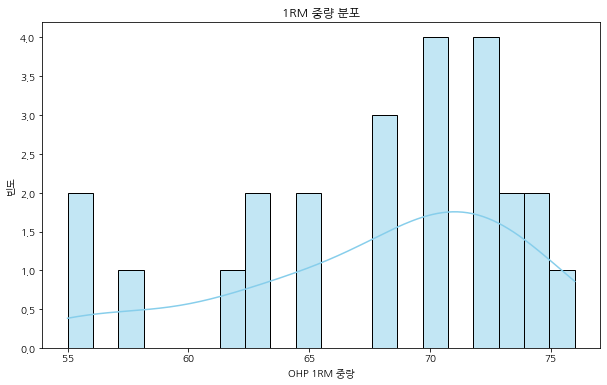

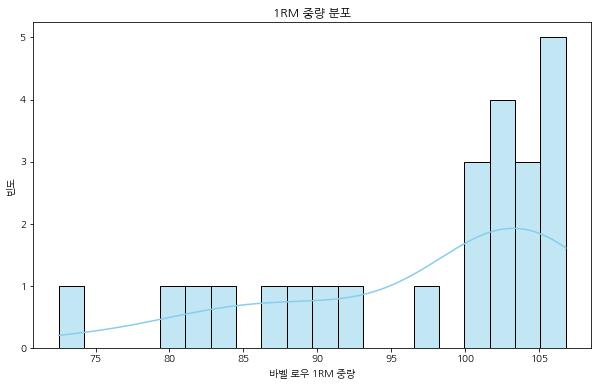

In [10]:
# 스쿼트 1RM 중량의 히스토그램 밀도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df['OHP(kg)'], bins=20, kde=True, color='skyblue')
plt.xlabel('OHP 1RM 중량')
plt.ylabel('빈도')
plt.title('1RM 중량 분포')
plt.show()

# 데드리프트 1RM 중량의 히스토그램 밀도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df['Pendlay_row(kg)'], bins=20, kde=True, color='skyblue')
plt.xlabel('바벨 로우 1RM 중량')
plt.ylabel('빈도')
plt.title('1RM 중량 분포')
plt.show()

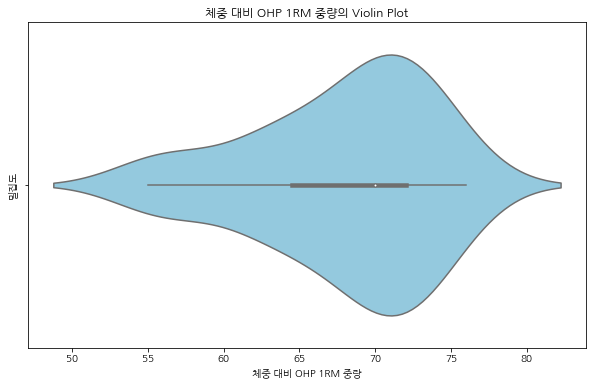

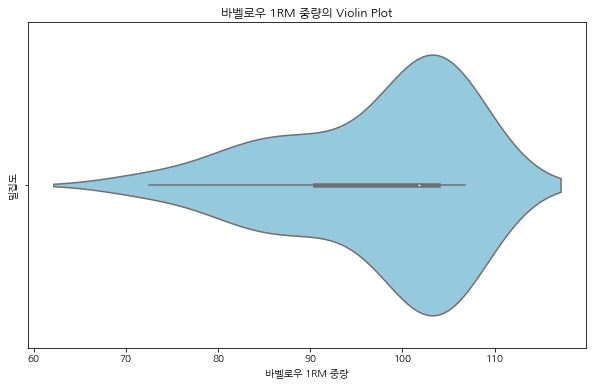

In [11]:
# Violin Plot 그리기
# 데이터 분포의 형태와 이상치를 확인하기 위해
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['OHP(kg)'], color='skyblue')
plt.xlabel('체중 대비 OHP 1RM 중량')
plt.ylabel('밀집도')
plt.title('체중 대비 OHP 1RM 중량의 Violin Plot')
plt.show()

# Violin Plot 그리기
# 데이터 분포의 형태와 이상치를 확인하기 위해
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Pendlay_row(kg)'], color='skyblue')
plt.xlabel('바벨로우 1RM 중량')
plt.ylabel('밀집도')
plt.title('바벨로우 1RM 중량의 Violin Plot')
plt.show()

In [12]:
# 상관관계 분석 - 스쿼트

# 스쿼트 중량과 몸무게의 피어슨 상관계수 계산을 통해 유의성 확인
print('[OHP]', end='\n\n')
for x in ['Weight(kg)','Rest_Period(day)','Workout_time']: 
    if x == 'Weight(kg)':
        print('*몸무게와 OHP 1RM과의 상관관계*')
    elif x == 'Rest_Period(day)':
        print('*휴식기간과 OHP 1RM과의 상관관계*')
    else :
        print('*운동시간과 OHP 1RM과의 상관관계*')
    
    stats, pval = pearsonr(df[x],  df['OHP(kg)'])
    print(x+"와 상관계수:", round(stats,4))
    print(x+"의 p-value:", round(pval,10))

    alpha = 0.05

    if pval < alpha:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 있습니다.", end='\n\n')
    else:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 없습니다.", end='\n\n')
        
# 상관관계 분석 - 데드리프트

# 데드리프트와 몸무게의 피어슨 상관계수 계산을 통해 유의성 확인
print('[바벨로우]', end='\n\n')
for x in ['Weight(kg)','Rest_Period(day)','Workout_time']: 
    if x == 'Weight(kg)':
        print('*몸무게와 바벨로우 1RM과의 상관관계*')
    elif x == 'Rest_Period(day)':
        print('*휴식기간과 바벨로우 1RM과의 상관관계*')
    else :
        print('*운동시간과 바벨로우 1RM과의 상관관계*')
    stats, pval = pearsonr(df[x],  df['Pendlay_row(kg)'])
    print(x,"와 상관계수:", round(stats,4))
    print(x, "의p-value:", round(pval,10))

    alpha = 0.05

    if pval < alpha:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 있습니다.", end='\n\n')
    else:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 없습니다.", end='\n\n')

[OHP]

*몸무게와 OHP 1RM과의 상관관계*
Weight(kg)와 상관계수: 0.8674
Weight(kg)의 p-value: 4.1e-08
Weight(kg)과(와) 1RM 중량은 유의미한 상관관계가 있습니다.

*휴식기간과 OHP 1RM과의 상관관계*
Rest_Period(day)와 상관계수: 0.4001
Rest_Period(day)의 p-value: 0.0527360567
Rest_Period(day)과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

*운동시간과 OHP 1RM과의 상관관계*
Workout_time와 상관계수: -0.1284
Workout_time의 p-value: 0.5498171925
Workout_time과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

[바벨로우]

*몸무게와 바벨로우 1RM과의 상관관계*
Weight(kg) 와 상관계수: 0.8902
Weight(kg) 의p-value: 5.7e-09
Weight(kg)과(와) 1RM 중량은 유의미한 상관관계가 있습니다.

*휴식기간과 바벨로우 1RM과의 상관관계*
Rest_Period(day) 와 상관계수: 0.3712
Rest_Period(day) 의p-value: 0.0741184733
Rest_Period(day)과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

*운동시간과 바벨로우 1RM과의 상관관계*
Workout_time 와 상관계수: -0.0283
Workout_time 의p-value: 0.895494873
Workout_time과(와) 1RM 중량은 유의미한 상관관계가 없습니다.



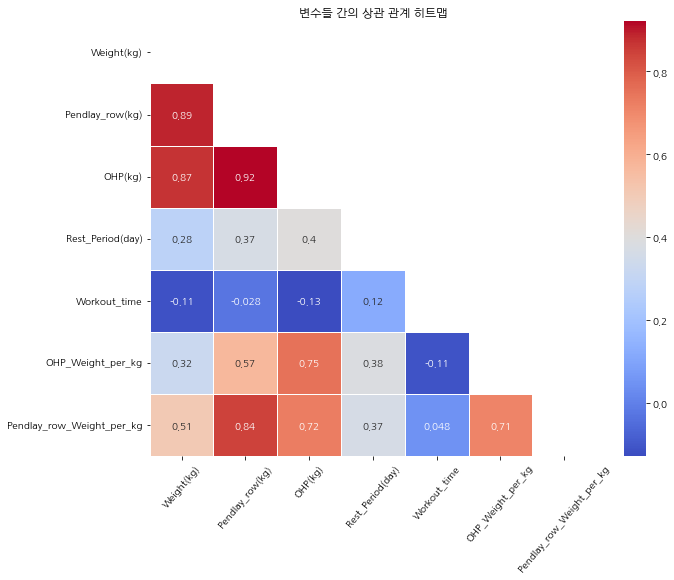

In [13]:
df2 = df.drop(['ID'], axis=1).copy()

# 상관 계수 행렬 계산
correlation_matrix = df2.corr()

# 중복데이터 제거를 위해 대각선 아래쪽 셀 가리기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

# x축 레이블을 45도로 회전
plt.xticks(rotation=50)

plt.title('변수들 간의 상관 관계 히트맵')
plt.show()

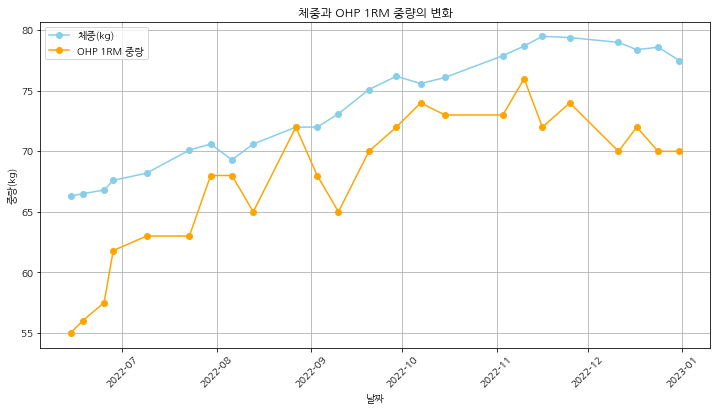

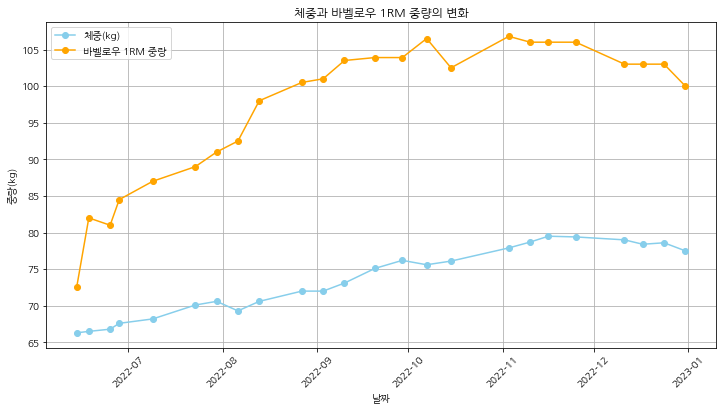

In [14]:
# 트렌드 그래프 그리기

# OHP
# 그래프 설정
plt.figure(figsize=(12, 6))

# 체중 그래프
plt.plot(df['DateTime'], df['Weight(kg)'], marker='o', linestyle='-', label='체중(kg)', color='skyblue')

# 체중 대비 스쿼트 1RM 중량 그래프
plt.plot(df['DateTime'], df['OHP(kg)'], marker='o', linestyle='-', label='OHP 1RM 중량', color='orange')

plt.xlabel('날짜')
plt.ylabel('중량(kg)')
plt.title('체중과 OHP 1RM 중량의 변화')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.legend()  # 범례 표시
plt.show()


# 바벨로우
# 그래프 설정
plt.figure(figsize=(12, 6))

# 체중 그래프
plt.plot(df['DateTime'], df['Weight(kg)'], marker='o', linestyle='-', label='체중(kg)', color='skyblue')

# 체중 대비 스쿼트 1RM 중량 그래프
plt.plot(df['DateTime'], df['Pendlay_row(kg)'], marker='o', linestyle='-', label='바벨로우 1RM 중량', color='orange')

plt.xlabel('날짜')
plt.ylabel('중량(kg)')
plt.title('체중과 바벨로우 1RM 중량의 변화')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.legend()  # 범례 표시
plt.show()

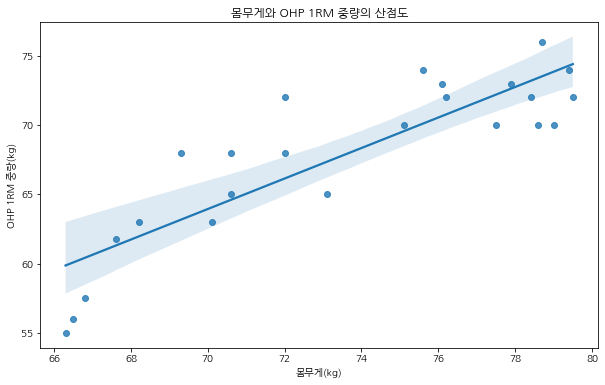

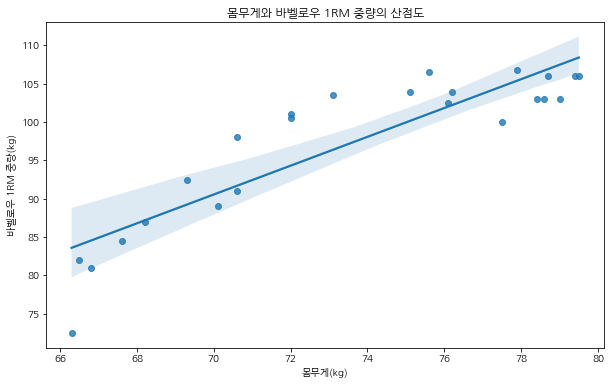

In [15]:
#몸무게와 OHP/바벨로우 중량의 시각화

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight(kg)', y='OHP(kg)')
plt.xlabel('몸무게(kg)')
plt.ylabel('OHP 1RM 중량(kg)')
plt.title('몸무게와 OHP 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight(kg)', y='Pendlay_row(kg)')
plt.xlabel('몸무게(kg)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('몸무게와 바벨로우 1RM 중량의 산점도')
plt.show()

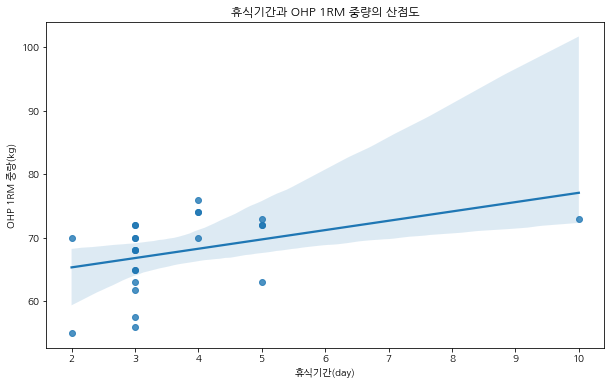

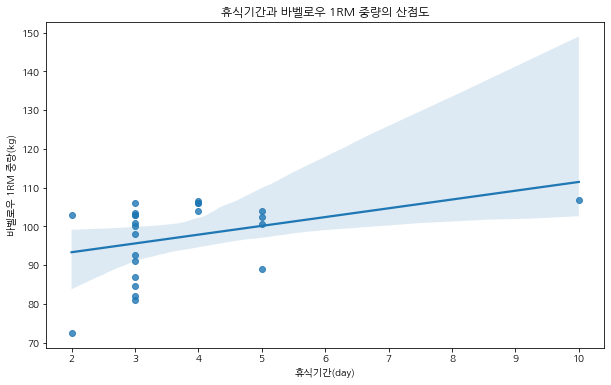

In [16]:
#휴식기간과 OHP/바벨로우 중량의 시각화

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Rest_Period(day)', y='OHP(kg)')
plt.xlabel('휴식기간(day)')
plt.ylabel('OHP 1RM 중량(kg)')
plt.title('휴식기간과 OHP 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Rest_Period(day)', y='Pendlay_row(kg)')
plt.xlabel('휴식기간(day)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('휴식기간과 바벨로우 1RM 중량의 산점도')
plt.show()

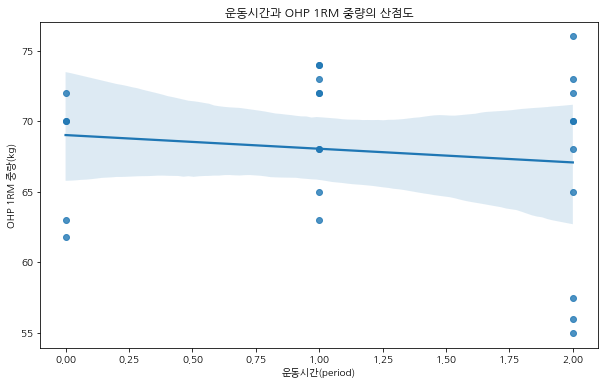

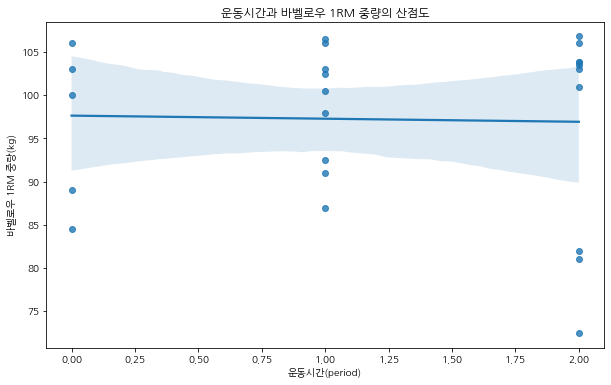

In [17]:
# 휴식기간과 OHP/바벨로우 중량의 시각화
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Workout_time', y='OHP(kg)')
plt.xlabel('운동시간(period)')
plt.ylabel('OHP 1RM 중량(kg)')
plt.title('운동시간과 OHP 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Workout_time', y='Pendlay_row(kg)')
plt.xlabel('운동시간(period)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('운동시간과 바벨로우 1RM 중량의 산점도')
plt.show()

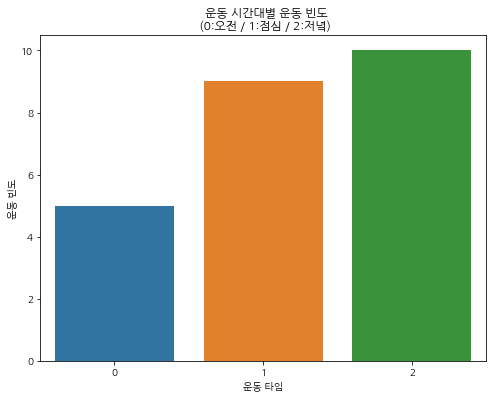

In [18]:
# 운동 시간대별 운동 빈도 분석
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Workout_time')
plt.xlabel('운동 타임')
plt.ylabel('운동 빈도')
plt.title('''   운동 시간대별 운동 빈도 
 (0:오전 / 1:점심 / 2:저녘)''')
plt.show()

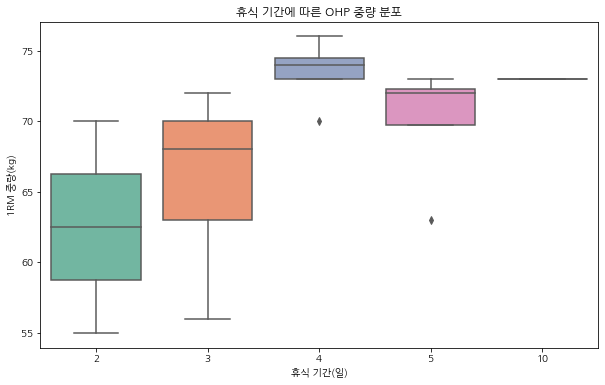

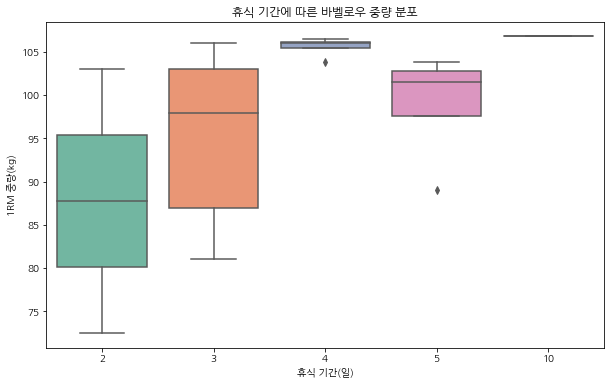

In [19]:
# 휴식 기간에 따른 1RM 중량 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rest_Period(day)', y='OHP(kg)', palette='Set2')
plt.xlabel('휴식 기간(일)')
plt.ylabel('1RM 중량(kg)')
plt.title('휴식 기간에 따른 OHP 중량 분포')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rest_Period(day)', y='Pendlay_row(kg)',  palette='Set2')
plt.xlabel('휴식 기간(일)')
plt.ylabel('1RM 중량(kg)')
plt.title('휴식 기간에 따른 바벨로우 중량 분포')

plt.show()